#### 导入MNIST 数据集

In [1]:
import sys,os

In [3]:
sys.path.append(os.pardir) 
# 为了导入父目录中的文件而进行的设定
from dataset.mnist import load_mnist

In [4]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [5]:
# 输出各个数据的形状
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [6]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image   #导入PIL模块，用于显示图片

In [7]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

#### 第1个参数normalize设置是否将输入图像正规化为0.0～1.0的值。
    如果将该参数设置为 False，则输入图像的像素会保持原来的0～255。
#### 第2个参数 flatten设置是否展开输入图像（变成一维数组）。
    如果将该参数设置为 False，则输入图像为1 × 28 × 28的三维数组；
    若设置为True，则输入图像会保存为由784个元素构成的一维数组。
#### 第3个参数one_hot_label设置是否将标签保存为onehot表示（one-hotrepresentation）。

In [10]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,normalize=False)
img = x_train[0]
label = t_train[0]
print(label) # 5

5


In [12]:
print(img.shape) # (784,)
img = img.reshape(28, 28) # 把图像的形状变成原来的尺寸
print(img.shape) # (28, 28)

(28, 28)
(28, 28)


In [13]:
img_show(img)

### 神经网络推理处理

In [34]:
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

In [35]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [36]:
def init_network(): 
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

# init_network()会读入保存在pickle文件 sample_weight.pkl中的学习到的权重参数

In [37]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [42]:
x, t = get_data()
network = init_network()

In [44]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 获取概率最高的元素的索引
    if p == t[i]:
        accuracy_cnt += 1  # 每有一个预测正确的 +1

In [45]:
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  #识别精度

Accuracy:0.9352


In [46]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [47]:
x.shape

(10000, 784)

In [48]:
x[0].shape

(784,)

In [49]:
W1.shape

(784, 50)

In [50]:
 W2.shape

(50, 100)

In [51]:
W3.shape

(100, 10)

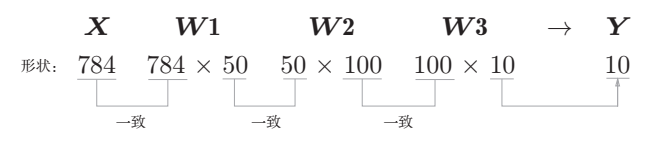

### 批处理
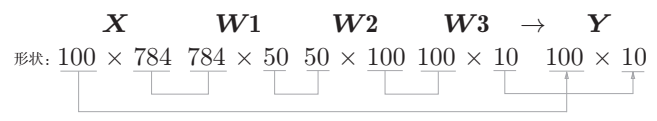
输入数据的形状为 100 × 784，输出数据的形状为100 × 10。这表示输入的100张图像的结果被一次性输出了

In [52]:
x, t = get_data()
network = init_network()

In [53]:
batch_size = 100 # 批数量
accuracy_cnt = 0

In [54]:
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

###### 通过 x[i:i+batch_size]从输入数据中抽出批数据。
###### x[i:i+batch_n]会取出从第i个到第i+batch_n个之间的数据。本例中是像x[0:100]、 x[100:200]

In [55]:
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
